In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('enhanced_anxiety_dataset.csv')

In [3]:
df.head()
df.shape

(11000, 19)

# Converting Categorical Data to Numeric

In [4]:
binary_cols = ['Smoking', 'Family History of Anxiety', 'Dizziness', 'Medication', 'Recent Major Life Event']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

categorical_cols = ['Gender', 'Occupation']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Sleep Hours                        11000 non-null  float64
 2   Physical Activity (hrs/week)       11000 non-null  float64
 3   Caffeine Intake (mg/day)           11000 non-null  int64  
 4   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 5   Smoking                            11000 non-null  int64  
 6   Family History of Anxiety          11000 non-null  int64  
 7   Stress Level (1-10)                11000 non-null  int64  
 8   Heart Rate (bpm)                   11000 non-null  int64  
 9   Breathing Rate (breaths/min)       11000 non-null  int64  
 10  Sweating Level (1-5)               11000 non-null  int64  
 11  Dizziness                          11000 non-null  int

In [6]:
df.shape

(11000, 31)

# Distribution of the Target Variable

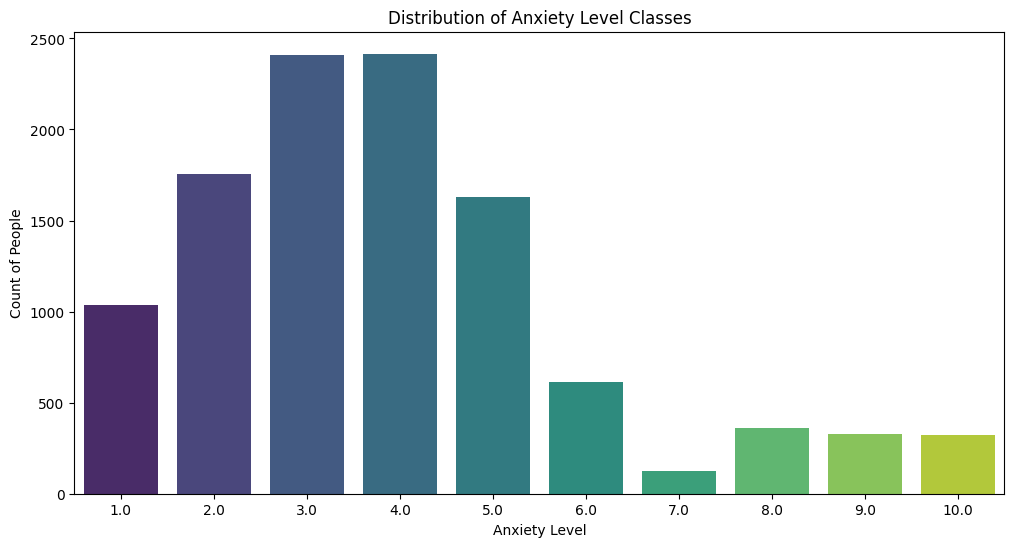

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Anxiety Level (1-10)', data=df, palette='viridis')
plt.title('Distribution of Anxiety Level Classes')
plt.xlabel('Anxiety Level')
plt.ylabel('Count of People')
plt.show()

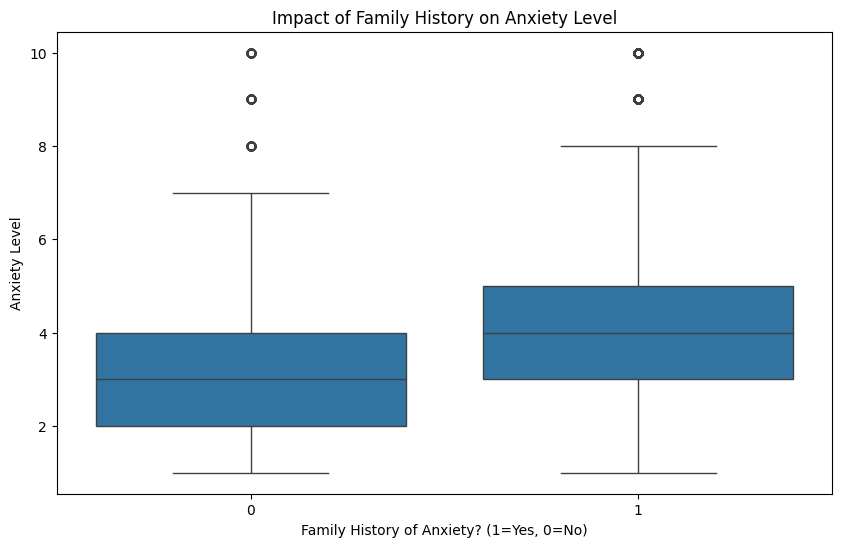

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Family History of Anxiety', y='Anxiety Level (1-10)', data=df)
plt.title('Impact of Family History on Anxiety Level')
plt.xlabel('Family History of Anxiety? (1=Yes, 0=No)')
plt.ylabel('Anxiety Level')
plt.show()

# Correlation Matrix and Heatmap

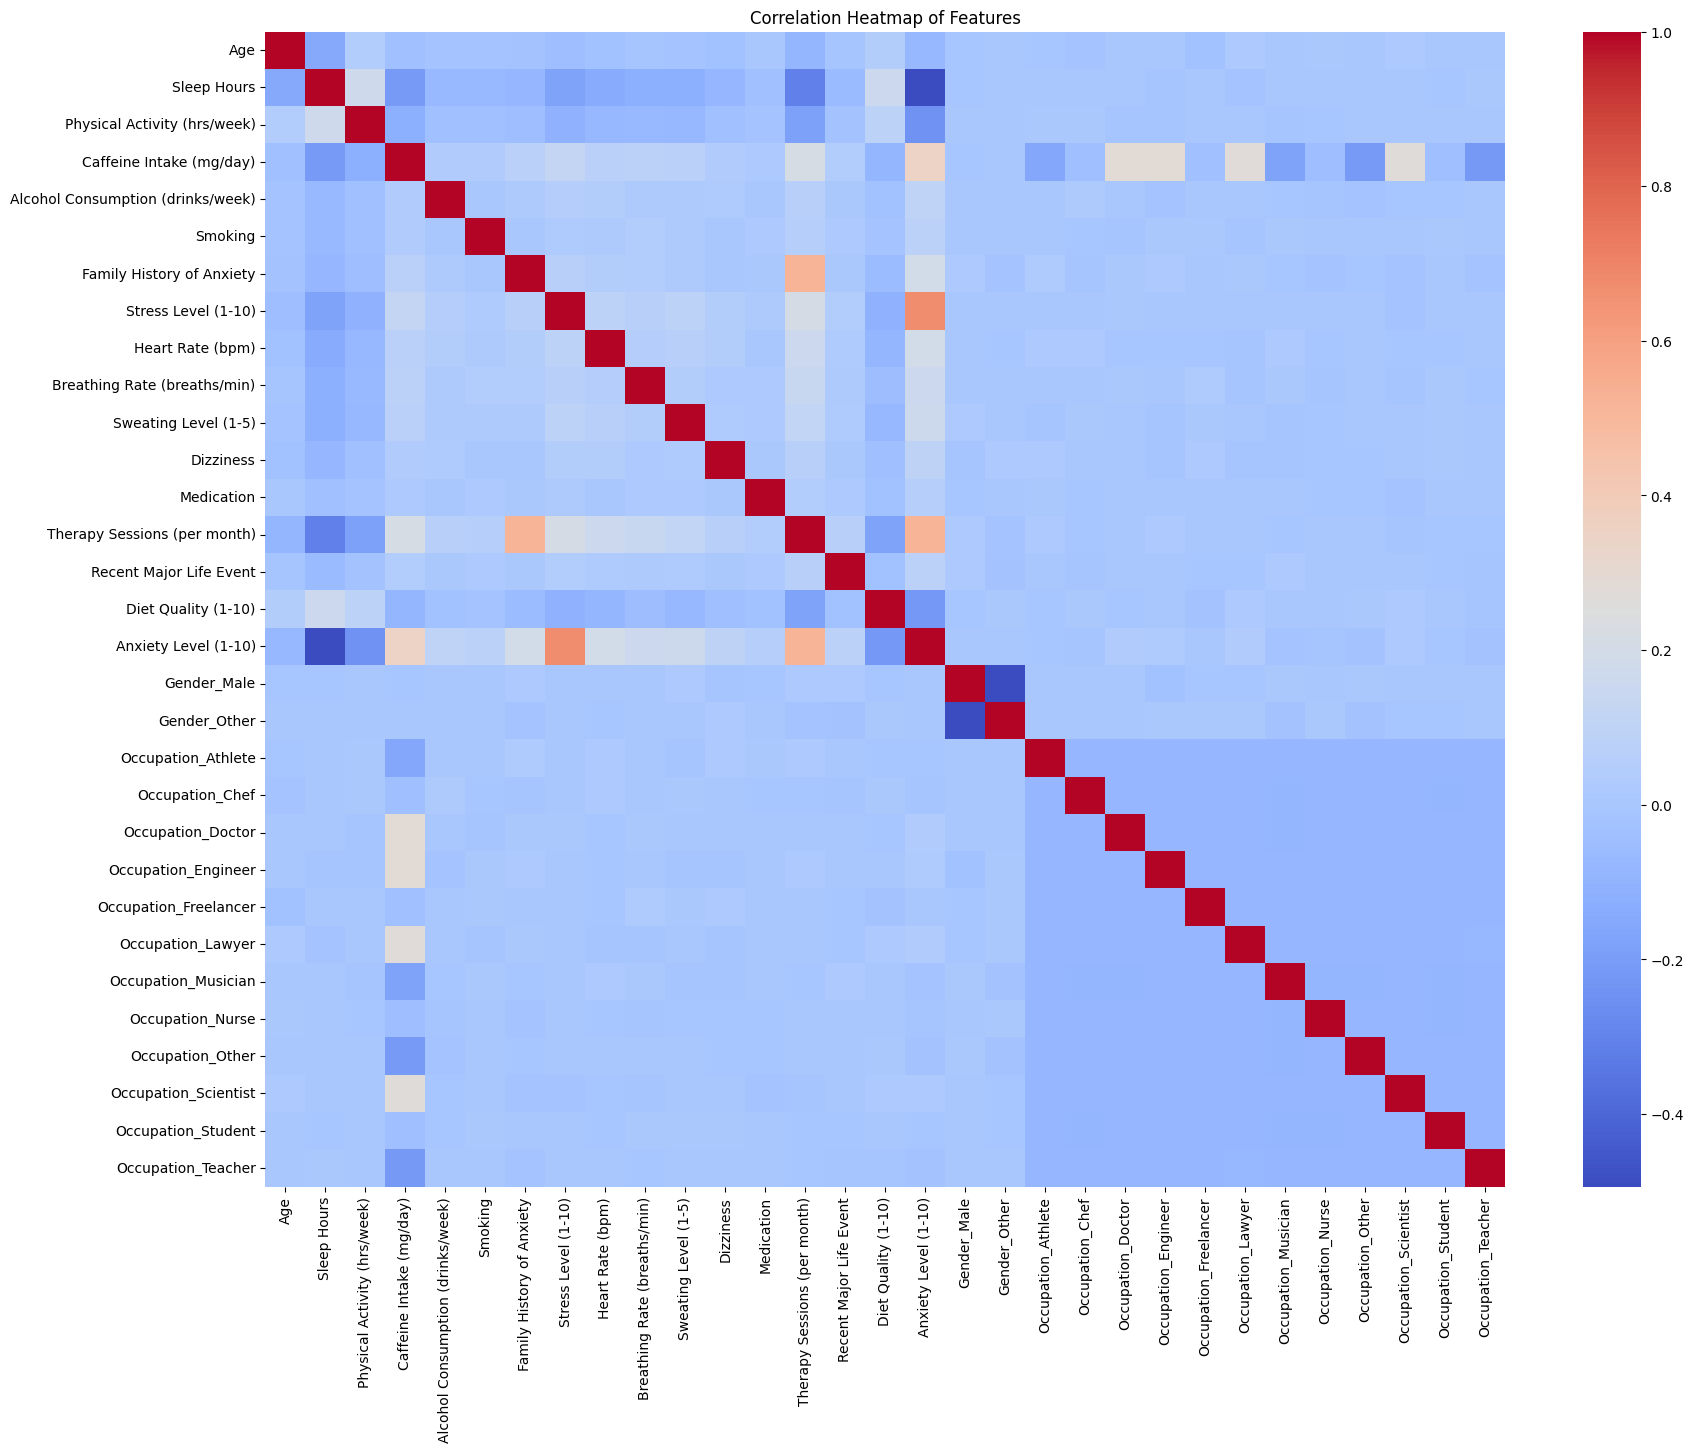

In [9]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

In [10]:
anxiety_corr = corr_matrix['Anxiety Level (1-10)'].abs().sort_values(ascending=False)
print(anxiety_corr)

Anxiety Level (1-10)                1.00
Stress Level (1-10)                 0.67
Therapy Sessions (per month)        0.52
Sleep Hours                         0.49
Caffeine Intake (mg/day)            0.35
Physical Activity (hrs/week)        0.24
Diet Quality (1-10)                 0.22
Family History of Anxiety           0.19
Heart Rate (bpm)                    0.19
Sweating Level (1-5)                0.16
Breathing Rate (breaths/min)        0.16
Alcohol Consumption (drinks/week)   0.10
Dizziness                           0.09
Smoking                             0.08
Recent Major Life Event             0.08
Age                                 0.07
Medication                          0.06
Occupation_Lawyer                   0.04
Occupation_Doctor                   0.04
Occupation_Engineer                 0.03
Occupation_Teacher                  0.02
Occupation_Other                    0.02
Occupation_Musician                 0.02
Occupation_Scientist                0.02
Occupation_Chef 

# LazyPredict

In [11]:
X = df.drop('Anxiety Level (1-10)', axis=1)
y = df['Anxiety Level (1-10)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 672
[LightGBM] [Info] Number of data points in the train set: 8800, number of used features: 30
[LightGBM] [Info] Start training from score 3.924659
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HistGradientBoostingRegressor                0.78       0.78  1.01        0.50
LGBMRegressor                                0.78       0.78  1.01        0.18
GradientBoostingRegressor                    0.77       0.78  1.02        1.74
RandomForestRegressor                        0.77       0.78  1.02        7.75
ExtraTreesRegressor                          0.77       0.77  1.03        6.11
NuSVR                                      

# Analyzing Feature Importance of the Best Model

In [12]:
X = df.drop('Anxiety Level (1-10)', axis=1)
y = df['Anxiety Level (1-10)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_model = LGBMRegressor(random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n--- LGBMRegressor Model Performance ---")
print("R²:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 649
[LightGBM] [Info] Number of data points in the train set: 8800, number of used features: 30
[LightGBM] [Info] Start training from score 3.924659

--- LGBMRegressor Model Performance ---
R²: 0.7793923506831445
Mean Squared Error (MSE): 1.0222249243098585
Mean Absolute Error (MAE): 0.8154705752007531


# Visualizing the Results

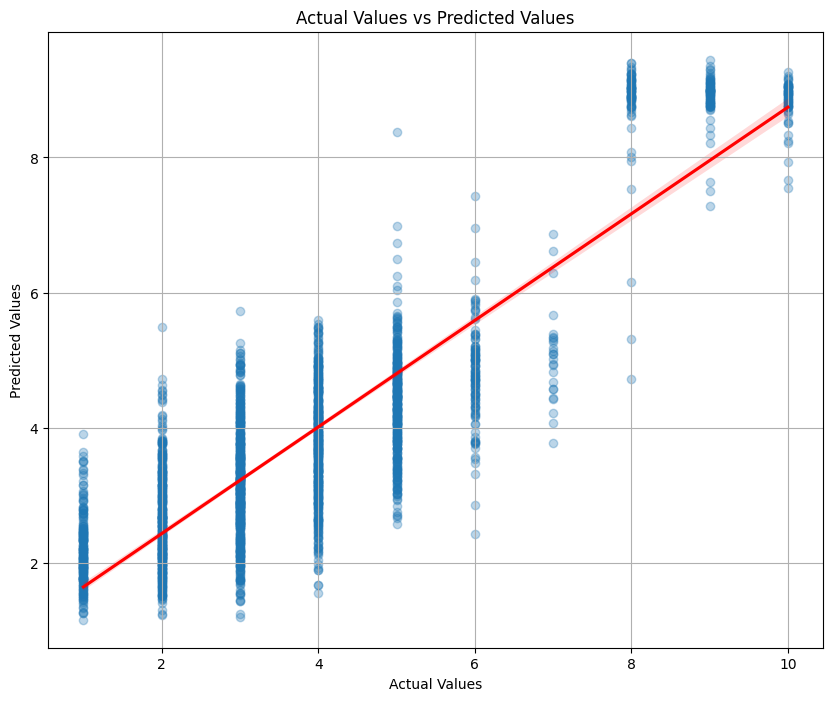

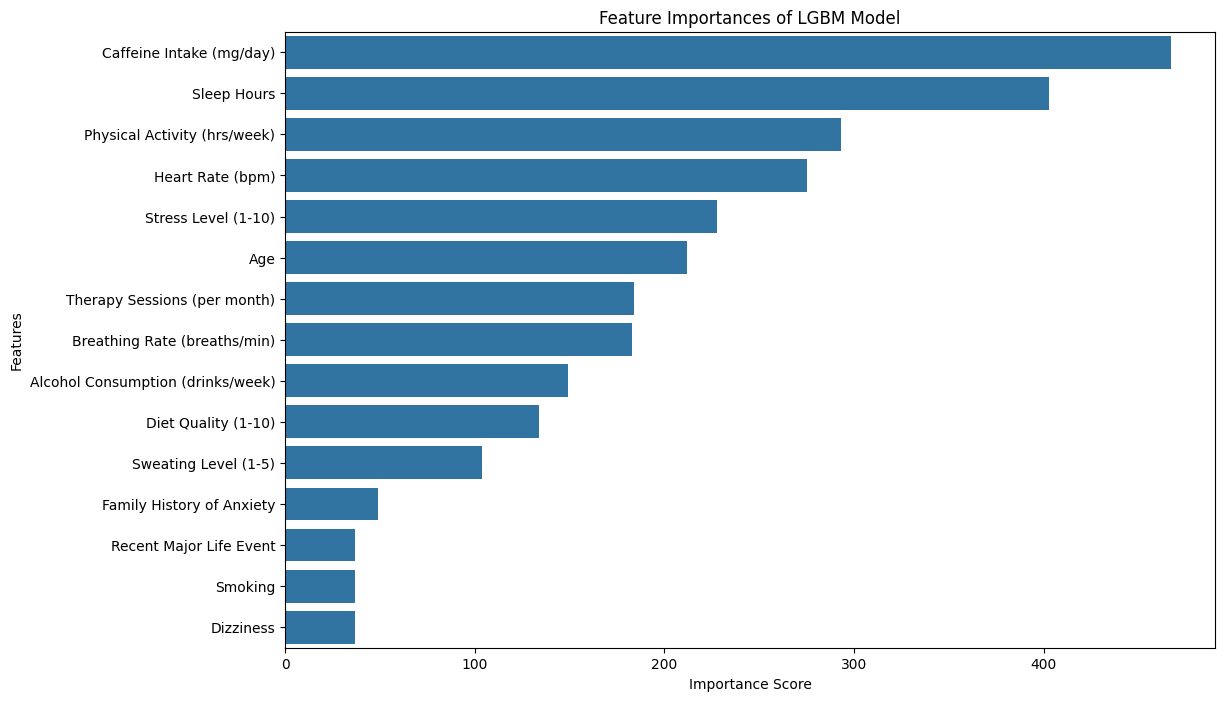

In [13]:
plt.figure(figsize=(10, 8))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Predicted Values")
plt.grid(True)
plt.show()

feature_importances = pd.DataFrame(best_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances['importance'].head(15), y=feature_importances.index[:15])
plt.title('Feature Importances of LGBM Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()